<h1>Web Scrapping on IPL Match Analytics</h1>

<h5>Python web scraping to extract IPL match results from the official IPL website for different seasons.With a dataset containing information such as session, match number, venue, date and time, winning team, first team, second team, and link.</h5>

<h4> Starting the code with, WebDriver Initialization and Basic Commands:</h4>

In [15]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time    
import pandas as pd  

#creating empty array list 
s = []
m = []
v = []
d=[]
w=[]
f=[]
sc=[]
l=[]

#Selecting driver as chrome
driver = webdriver.Chrome()

#Applying loop in the url link to acess all the seasons from 2008 till 2023
for i in range(2008,2024,1):
    
    #ipl browser url and opening the website 
    driver.get(f'https://www.iplt20.com/matches/results/{i}')     
    time.sleep(1)

    #Extracting data using xpath in Selenium
    session = driver.find_element('xpath', "//div[@class='col-lg-2 col-md-2 col-sm-6'][3]/div/div[@class='cSBDisplay ng-binding']")
    match_no= driver.find_elements('xpath',"//div[@class='vn-schedule-head']/div/span[@class='vn-matchOrder ng-binding ng-scope']")
    venue=driver.find_elements("xpath", "//div[@class='w50 fl']/span/p")
    date_time= driver.find_elements("xpath", "//div[@class='w50 fl']/div")
    match_won=driver.find_elements("xpath","//div[@class=' w20 tl pr50']/div")
    first_team=driver.find_elements("xpath","//div[@class='vn-shedTeam']")
    second_team=driver.find_elements("xpath","//div[@class='vn-shedTeam vn-team-2']")
    link=driver.find_elements("xpath","//div[@class='vn-ticnbtn']/a")

    
    for j in range(59):                      # In single page we have 59 matches,so applying loop in range 59
        s.append(session.text)    

        try:
            m.append(match_no[j].text)          #using try except to handle exceptions 

        except Exception:
            m.append("no_data")

        try:
            v.append(venue[j].text)
        except Exception:
            v.append("no_data")

        try:
            d.append(date_time[j].text)
        except Exception:
            d.append("no_data")

        try:
            w.append(match_won[j].text)            #appending the extracted elements to the empty array lists
        except Exception:
            w.append("no_data")

        try:
            f.append(first_team[j].text)
        except Exception:
            f.append("no_data")

        try:
            sc.append(second_team[j].text)
        except Exception:
            sc.append("no_data")

        try:
            l.append(link[j].get_attribute('href'))
        except Exception:
            l.append("no_data")
            

#creating a dictionary named 'dict' with following key:value pair
dict={"Session":s, "Match_No":m, "Venue":v, "Date_Time":d, "Winning_Team": w, "First_Team": f, "Second_Team":sc, "link":l}


#creating a dataframe named df using pandas
df=pd.DataFrame(dict)
print(df)

df.to_csv("Project_2(ipl_matches).csv",index=False)         #making a csv file named "Project_2(ipl_matches)" for EDA


         Session  Match_No                              Venue  \
0    SEASON 2008  MATCH 59      DY Patil Stadium, NAVI MUMBAI   
1    SEASON 2008  MATCH 58           Wankhede Stadium, Mumbai   
2    SEASON 2008  MATCH 57           Wankhede Stadium, Mumbai   
3    SEASON 2008  MATCH 56          IS Bindra Stadium, Mohali   
4    SEASON 2008  MATCH 55  M. Chinnaswamy Stadium, Bengaluru   
..           ...       ...                                ...   
939                no_data                            no_data   
940                no_data                            no_data   
941                no_data                            no_data   
942                no_data                            no_data   
943                no_data                            no_data   

                     Date_Time                          Winning_Team  \
0     JUN, SUN 1 , 8:00 pm IST     RAJASTHAN ROYALS WON BY 3 WICKETS   
1    MAY, SAT 31 , 8:00 pm IST  CHENNAI SUPER KINGS WON BY 9 WICKETS   
2  

<h2> EDA using pandas and other visualization libraries.</h2>

In [ ]:
import numpy as np
import pandas as pd

In [16]:
#Reading/importing csv file
df=pd.read_csv("Project_2(ipl_matches).csv")
df

,Session,Match_No,Venue,Date_Time,Winning_Team,First_Team,Second_Team,link
0,SEASON 2008,MATCH 59,"DY Patil Stadium, NAVI MUMBAI","JUN, SUN 1 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 3 WICKETS,CHENNAI SUPER KINGS\n163/5\n(20 OV),RAJASTHAN ROYALS\n164/7\n(20 OV ),https://www.iplt20.com/match/2008/10058
1,SEASON 2008,MATCH 58,"Wankhede Stadium, Mumbai","MAY, SAT 31 , 8:00 pm IST",CHENNAI SUPER KINGS WON BY 9 WICKETS,CHENNAI SUPER KINGS\n116/1\n(14.5 OV),PUNJAB KINGS\n112/8\n(20 OV ),https://www.iplt20.com/match/2008/10057
2,SEASON 2008,MATCH 57,"Wankhede Stadium, Mumbai","MAY, FRI 30 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 105 RUNS,DELHI DAREDEVILS\n87\n(16.1 OV),RAJASTHAN ROYALS\n192/9\n(20 OV ),https://www.iplt20.com/match/2008/10056
3,SEASON 2008,MATCH 56,"IS Bindra Stadium, Mohali","MAY, WED 28 , 8:00 pm IST",PUNJAB KINGS WON BY 41 RUNS,PUNJAB KINGS\n221/3\n(20 OV),RAJASTHAN ROYALS\n180/7\n(20 OV ),https://www.iplt20.com/match/2008/10055
4,SEASON 2008,MATCH 55,"M. Chinnaswamy Stadium, Bengaluru","MAY, WED 28 , 4:00 pm IST",MUMBAI INDIANS WON BY 9 WICKETS,ROYAL CHALLENGERS BANGALORE\n122/9\n(18 OV),MUMBAI INDIANS\n126/1\n(16 OV ),https://www.iplt20.com/match/2008/10054
...,...,...,...,...,...,...,...,...
939,NaN,no_data,no_data,no_data,no_data,no_data,no_data,no_data
940,NaN,no_data,no_data,no_data,no_data,no_data,no_data,no_data
941,NaN,no_data,no_data,no_data,no_data,no_data,no_data,no_data
942,NaN,no_data,no_data,no_data,no_data,no_data,no_data,no_data


In [18]:
# Replacing values 
df.replace('no_data', 0, inplace = True)
df

,Session,Match_No,Venue,Date_Time,Winning_Team,First_Team,Second_Team,link
0,SEASON 2008,MATCH 59,"DY Patil Stadium, NAVI MUMBAI","JUN, SUN 1 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 3 WICKETS,CHENNAI SUPER KINGS\n163/5\n(20 OV),RAJASTHAN ROYALS\n164/7\n(20 OV ),https://www.iplt20.com/match/2008/10058
1,SEASON 2008,MATCH 58,"Wankhede Stadium, Mumbai","MAY, SAT 31 , 8:00 pm IST",CHENNAI SUPER KINGS WON BY 9 WICKETS,CHENNAI SUPER KINGS\n116/1\n(14.5 OV),PUNJAB KINGS\n112/8\n(20 OV ),https://www.iplt20.com/match/2008/10057
2,SEASON 2008,MATCH 57,"Wankhede Stadium, Mumbai","MAY, FRI 30 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 105 RUNS,DELHI DAREDEVILS\n87\n(16.1 OV),RAJASTHAN ROYALS\n192/9\n(20 OV ),https://www.iplt20.com/match/2008/10056
3,SEASON 2008,MATCH 56,"IS Bindra Stadium, Mohali","MAY, WED 28 , 8:00 pm IST",PUNJAB KINGS WON BY 41 RUNS,PUNJAB KINGS\n221/3\n(20 OV),RAJASTHAN ROYALS\n180/7\n(20 OV ),https://www.iplt20.com/match/2008/10055
4,SEASON 2008,MATCH 55,"M. Chinnaswamy Stadium, Bengaluru","MAY, WED 28 , 4:00 pm IST",MUMBAI INDIANS WON BY 9 WICKETS,ROYAL CHALLENGERS BANGALORE\n122/9\n(18 OV),MUMBAI INDIANS\n126/1\n(16 OV ),https://www.iplt20.com/match/2008/10054
...,...,...,...,...,...,...,...,...
939,NaN,0,0,0,0,0,0,0
940,NaN,0,0,0,0,0,0,0
941,NaN,0,0,0,0,0,0,0
942,NaN,0,0,0,0,0,0,0


In [19]:
#getting datatypes of columns
df.dtypes

Session         object
Match_No        object
Venue           object
Date_Time       object
Winning_Team    object
First_Team      object
Second_Team     object
link            object
dtype: object

In [23]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,Session,Match_No,Venue,Date_Time,Winning_Team,First_Team,Second_Team,link
count,828,944,944,944,944,708,944,944
unique,15,78,34,512,359,14,694,709
top,SEASON 2008,0,0,0,0,ROYAL CHALLENGERS BANGALORE,0,0
freq,59,236,236,236,236,95,236,236


<h4> Visualisation using Pandas</h4>

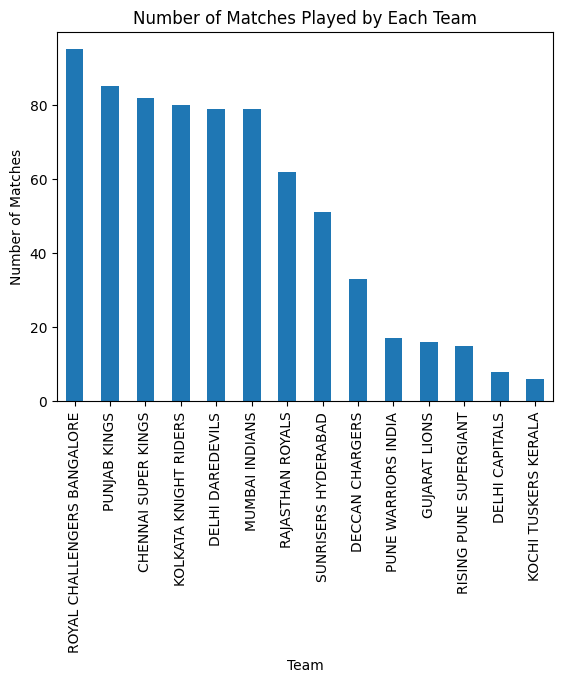

In [28]:
import matplotlib.pyplot as plt

# Create a bar chart of the number of matches played by each team
df['First_Team'].value_counts().plot(kind='bar')
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.show()


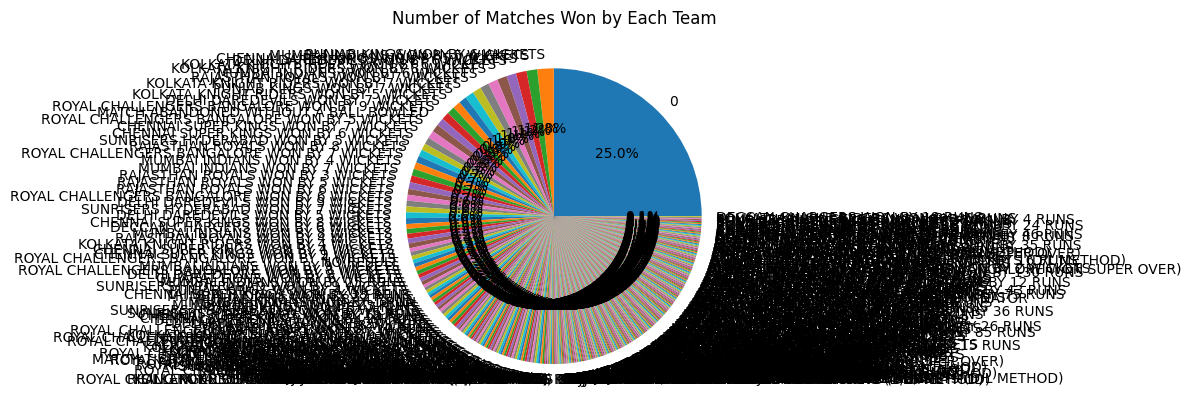

In [31]:
# Create a pie chart of the number of matches won by each team
df['Winning_Team'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Number of Matches Won by Each Team')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_12348\449043764.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.count(axis=0))


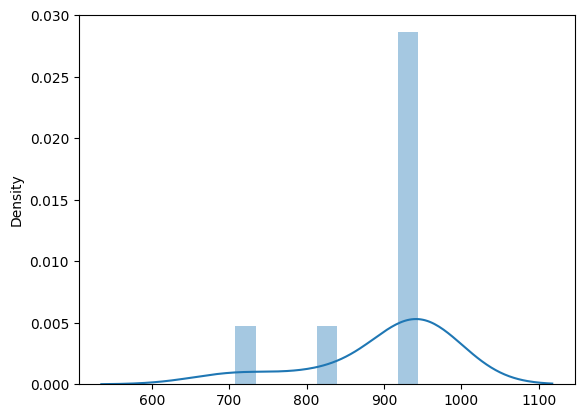

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df.count(axis=0))
plt.show()